<a href="https://colab.research.google.com/github/ultrasmartary/MLCollege/blob/master/MLCollege_Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Perceptron: Solving logical-OR problem
import numpy as np
def step(net):
    if net>0:
        return 1
    else:
        return 0
    
x=np.array([[0,0],[0,1],[1,0],[1,1]])
#w=np.array([-0.2,0.4])
y=np.array([0,1,1,1])
#net3=x*w
#print(np.shape(x),x)
#print(y)
#print(x[0][1])
#print(x[1][1])
#print(x[2][1])
#print(x[3][1])
w1=-0.2
w2=0.4
#print(w1*x[1][0]+w2*x[1][1])
#print(y[2])
j=1
while j<=4:
    i=0
    while i<=3:
        #net2=w[i][0]+w[i][1]
        net2=w1*x[i][0]+w2*x[i][1]
        #print(net2)
        a=step(net2)
        #print(y[i],a)
        if a!=y[i]:
            w1=w1+0.2*(y[i]-a)*x[i][0]
            w2=w2+0.2*(y[i]-a)*x[i][1]
        print(j,"x1= ",x[i][0],"x2= ",x[i][1],"w1= ",w1,"w2= ",w2)
        i=i+1
    j=j+1
#a=np.array([1])
#b=np.array([0])
a=0
b=1
net1=w1*a+w2*b
#net1=w1*a[0]+w2*b[0]
#print(w1,w2)
print("For x1=",a," and x2=",b,"y will be:",step(net1))




1 x1=  0 x2=  0 w1=  -0.2 w2=  0.4
1 x1=  0 x2=  1 w1=  -0.2 w2=  0.4
1 x1=  1 x2=  0 w1=  0.0 w2=  0.4
1 x1=  1 x2=  1 w1=  0.0 w2=  0.4
2 x1=  0 x2=  0 w1=  0.0 w2=  0.4
2 x1=  0 x2=  1 w1=  0.0 w2=  0.4
2 x1=  1 x2=  0 w1=  0.2 w2=  0.4
2 x1=  1 x2=  1 w1=  0.2 w2=  0.4
3 x1=  0 x2=  0 w1=  0.2 w2=  0.4
3 x1=  0 x2=  1 w1=  0.2 w2=  0.4
3 x1=  1 x2=  0 w1=  0.2 w2=  0.4
3 x1=  1 x2=  1 w1=  0.2 w2=  0.4
4 x1=  0 x2=  0 w1=  0.2 w2=  0.4
4 x1=  0 x2=  1 w1=  0.2 w2=  0.4
4 x1=  1 x2=  0 w1=  0.2 w2=  0.4
4 x1=  1 x2=  1 w1=  0.2 w2=  0.4
For x1= 0  and x2= 1 y will be: 1


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1])
clf = Perceptron()
clf.fit(x, y)
print(clf.score(x, y))
a=np.array([[1,0]])
print(clf.predict(a))

1.0
[1]


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[[71082     0]
 [  120     0]]
0.9983146540827504


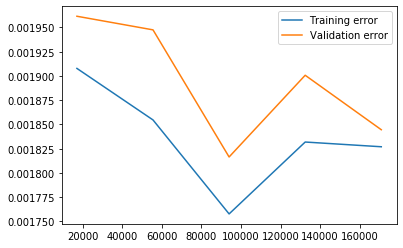

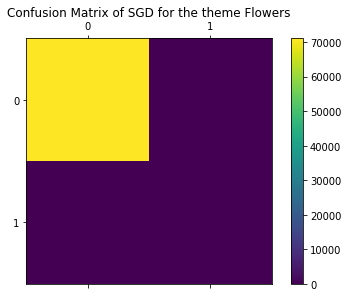

In [ ]:
#SGD: Stochastic Gradient Descent classifier
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
data=pd.read_csv("creditcard.csv")
x=data.iloc[:,[1,28]].values
y=data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
clf=SGDClassifier()
clf.fit(x_train,y_train)
a=clf.predict(x_test)
print(clf)
cm = confusion_matrix(y_test, a)
print(cm)
print(clf.score(x_test,y_test))
#Curve Plot
train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(), x_train, y_train.ravel(), cv=5)
train_scores_mean = np.mean(1-train_scores,axis = 1)
validation_scores_mean = np.mean(1-valid_scores,axis =1 )
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.legend(loc='best')
plt.show()
#confusion_matrix plot

cm=confusion_matrix(y_test,a)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.tight_layout()
cax=ax.matshow(cm)
plt.title('Confusion Matrix of SGD for the theme Flowers',pad=5)
fig.colorbar(cax)
plt.show()
